# Building and using styles in matplotlib

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

## rcParams

rcParams are settings for matplotlib. They're how stylesheets work (the thing when you use `plt.style.use`.

You can find examples of the different styles [here](https://matplotlib.org/2.1.1/gallery/style_sheets/style_sheets_reference.html) and [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html). A big long list is:

- bmh
- classic
- dark_background
- fivethirtyeight
- ggplot 
- grayscale
- seaborn-bright 
- seaborn-colorblind 
- seaborn-dark 
- seaborn-dark-palette 
- seaborn-darkgrid 
- seaborn-deep 
- seaborn-muted
- seaborn-notebook 
- seaborn-paper
- seaborn-pastel 
- seaborn-poster 
- seaborn-talk 
- seaborn-ticks
- seaborn-white
- seaborn-whitegrid 

You can find all of the options you can use with `plt.style.use` [in these files here](https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib)

### FiveThirtyEight

This is the same as `plt.style.use('fivethirtyeight')`. You can find the file it's based on [right here](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle).

In [2]:
# # What do these things mean???
# plt.rcdefaults()
# plt.rcParams.update({
#   'lines.linewidth': 4,
#   'lines.solid_capstyle': 'butt',
#   'legend.fancybox': True,
#   'axes.prop_cycle': cycler('color', ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']),
#   'axes.facecolor': '#f0f0f0',
#   'axes.labelsize': 'large',
#   'axes.axisbelow': True,
#   'axes.grid': True,
#   'axes.edgecolor': '#f0f0f0',
#   'axes.linewidth': 3.0,
#   'axes.titlesize': 'x-large',
#   'patch.edgecolor': '#f0f0f0',
#   'patch.linewidth': 0.5,
#   'svg.fonttype': 'path',
#   'grid.linestyle': '-',
#   'grid.linewidth': 1.0,
#   'grid.color': '#cbcbcb',
#   'xtick.major.size': 0,
#   'xtick.minor.size': 0,
#   'ytick.major.size': 0,
#   'ytick.minor.size': 0,
#   'font.size': 14.0,
#   'savefig.edgecolor': '#f0f0f0',
#   'savefig.facecolor': '#f0f0f0',
#   'figure.subplot.left': 0.08,
#   'figure.subplot.right': 0.95,
#   'figure.subplot.bottom': 0.07,
#   'figure.facecolor': '#f0f0f0',
# })

### ggplot

This is the same as `plt.style.use('ggplot')`. You can find the file it's based on [here](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/stylelib/ggplot.mplstyle).

In [3]:
# plt.rcdefaults()
# plt.rcParams.update({
#   'patch.linewidth': 0.5,
#   'patch.facecolor': '#348ABD',
#   'patch.edgecolor': '#EEEEEE',
#   'patch.antialiased': True,
#   'font.size': 10.0,
#   'axes.facecolor': '#E5E5E5',
#   'axes.edgecolor': 'white',
#   'axes.linewidth': '1',
#   'axes.grid': True,
#   'axes.titlesize': 'x-large',
#   'axes.labelsize': 'large',
#   'axes.labelcolor': '#555555',
#   'axes.axisbelow': True,
#   'axes.prop_cycle': cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']),
#   'xtick.color': '#555555',
#   'xtick.direction': 'out',
#   'ytick.color': '#555555',
#   'ytick.direction': 'out',
#   'grid.color': 'white',
#   'grid.linestyle': '-',
#   'figure.facecolor': 'white'
# })

### Yours!

My abbreviated list of options to update can be found [here as a gist](https://gist.github.com/jsoma/8e453751dac9961afdef87c81ea4d5a4).

Make sure you put **commas at the end of your lines.**

In [79]:
# inspiration https://en.wikipedia.org/wiki/A_Sunday_Afternoon_on_the_Island_of_La_Grande_Jatte
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 10.0,
    'axes.facecolor': 'EFE8D4',
    'axes.edgecolor': 'white',
    'axes.grid': False,
    'axes.labelcolor': '#A7BBD6',
    'axes.prop_cycle': cycler('color', ['#2B5738', '#C0B470', '#dd8c10', '#BC705D','#0B1873']),
    'legend.fontsize': 'small'
})

# Grouped bar graph (2 colors)

In [80]:
df = pd.read_csv("gender.csv")
df.head(3)

,state,male,female
0,Texas,30,22
1,New Mexico,45,34
2,Colorado,32,44


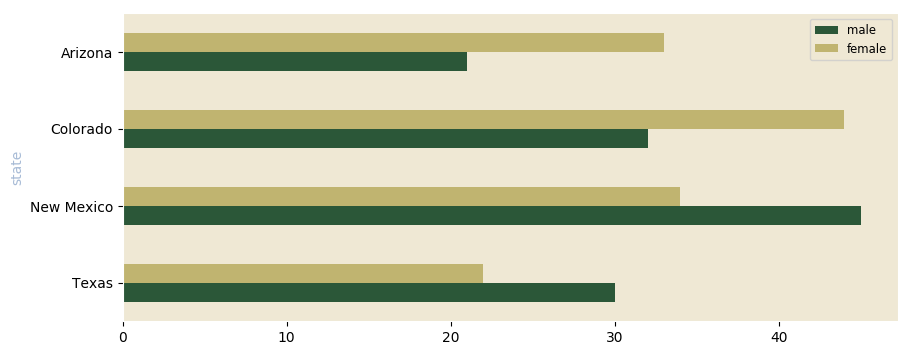

In [82]:
ax = df.plot(x='state', kind='barh', figsize=(10,4))

# CUSTOMIZATION CODE GOES UNDER HERE


# then we save it
plt.savefig("graph-bar-grouped.pdf")
plt.show()

# Bar graph (Single color)

In [83]:
df = pd.read_csv("countries.csv")
result = df.groupby("continent").life_expectancy.median().sort_values()
result

continent
Africa        52.1025
Oceania       67.4955
Asia          70.4275
N. America    70.5765
S. America    70.7660
Europe        75.5800
Name: life_expectancy, dtype: float64

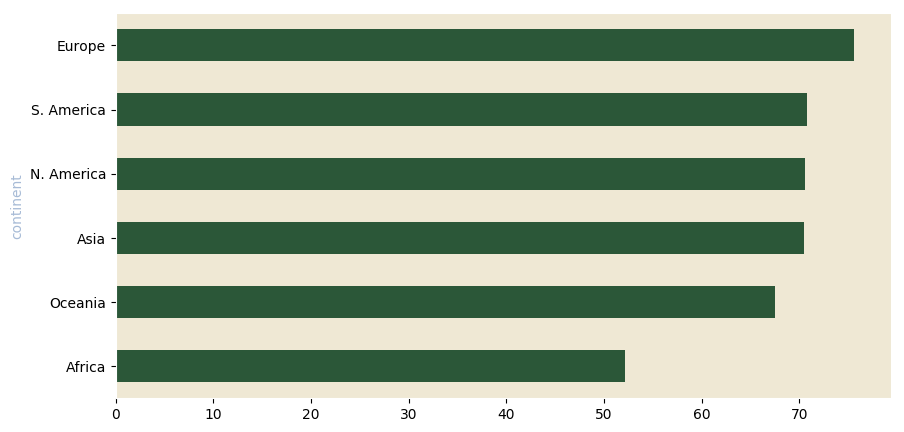

In [84]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax = result.plot(kind='barh', figsize=(10, 5), color=color)

# CUSTOMIZATION CODE GOES UNDER HERE


# then we save it
plt.savefig("graph-bar.pdf")
plt.show()

# Line graph

In [85]:
df = pd.read_csv("visas-by-continent-long.csv")
df = df.groupby(["year", "continent"]).visas.sum().unstack().reset_index()
df.drop(columns='Unknown', inplace=True)
df['year'] = pd.to_datetime(df.year, format="%Y")
df.set_index('year', inplace=True)
percent_df = df.div(df.sum(axis=1), axis='rows') * 100

percent_df.head(2)

continent,Africa,Asia,Europe,North America,Oceania,South America
year,,,,,,
1997-01-01,4.532365,40.533368,19.424055,16.410128,0.787181,18.312904
1998-01-01,4.905586,35.360192,18.980460,21.200149,0.812552,18.741061


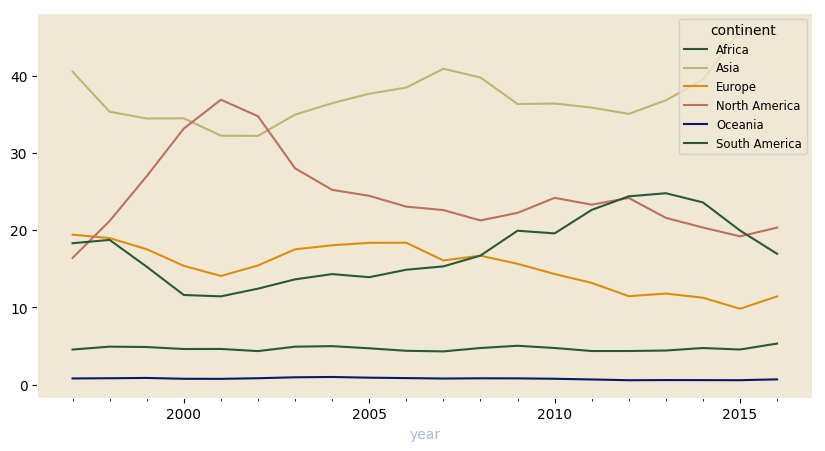

In [86]:
ax = percent_df.plot(kind='line', figsize=(10, 5))

# CUSTOMIZATION CODE GOES UNDER HERE


# then we save it
plt.savefig("graph-lines.pdf")
plt.show()

# Scatter plot

In [87]:
df = pd.read_csv("countries.csv")
df.head(2)

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856


In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

# Don't touch this part of the code!
colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = df.groupby('continent')
for name, group in groups:
    group.plot(kind='scatter', x='gdp_per_capita', y='life_expectancy', color=colors.pop(), label=name, s= 5 + (group.population / 200000), ax=ax, alpha=0.75)
ax.legend_.remove()

# CUSTOMIZATION CODE GOES UNDER HERE


# then we save it
plt.savefig("graph-scatter.pdf")
plt.show()

IndexError: pop from empty list